In [1]:
import pandas as pd
import numpy as np
import os
import time
import pickle

### read in files

In [2]:
datadir = '../../preprocess/kleinlab/output_subset/'

In [3]:
df_metadata = pd.read_csv(os.path.join(datadir,'metadata.tsv.gz'),sep='\t',index_col=0)
print(df_metadata.shape)
df_metadata.head()

(3221, 4)


,time,Population,Annotation,Well
84,6.0,LK,Mast,2
115,6.0,LK,Monocyte,2
190,6.0,LK,Mast,2
205,6.0,LK,Mast,2
337,6.0,LK,Meg,2


In [4]:
df_coord = pd.read_csv(os.path.join(datadir,'coordinates.tsv.gz'),sep='\t',index_col=0)
print(df_coord.shape)
df_coord.head()

(3221, 2)


,0,1
84,-1674.817,-867.362
115,2970.137,390.955
190,-1667.094,-846.103
205,-1769.354,-902.560
337,-1866.029,739.786


In [5]:
df_clones = pd.read_csv(os.path.join(datadir,'clones.tsv.gz'),sep='\t',index_col=0)
print(df_clones.shape)
df_clones.head()

(3221, 5864)


,0,1,2,3,4,5,6,7,8,9,...,5854,5855,5856,5857,5858,5859,5860,5861,5862,5863
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
### remove clones that have zero cells
df_clones = df_clones[df_clones.columns[df_clones.sum(axis=0)>0]]
print(df_clones.shape)
df_clones.head()

(3221, 365)


,50,82,105,111,134,190,213,239,251,269,...,5744,5764,5772,5773,5774,5805,5806,5818,5832,5850
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
190,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
205,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### define function to calculate clone pair-wise distance

In [8]:
### This is the function you should write
### here I am importing the one I wrote so you can have a reference

from megatron_HC import cal_clone_dist
st=time.time()
list_dist = cal_clone_dist(df_clones,df_coord,df_metadata)
ed = time.time()
print('running time(mins): '+ str((ed-st)/60))

`list_dist` stores the clone-pair distance. The order should be consistent with the column of `df_clones`

E.g.  given clones `[50,82,105,111]`,
the order of clone pairs in `list_dist` should be:

`[(50, 82), (50, 105), (50, 111), (82, 105), (82, 111), (105, 111)]`

In [9]:
list_dist

[1549.6929777720013,
 1116.2484441444446,
 562.719230058505,
 1306.2329146713298,
 1242.1556965007712,
 2472.5205032197896,
 887.2586942840254,
 1137.6648403660831,
 1347.924232333728,
 321.9892331248441,
 642.8140404397026,
 1665.0294820127529,
 1914.7974295836984,
 2088.2993938720015,
 2017.725783381394,
 917.9678325611312,
 1365.7491412312856,
 1246.567881315183,
 1671.0992427471913,
 1584.6436498227267,
 1068.171932813823,
 201.74106933024632,
 1755.7876261879007,
 281.9759941067577,
 213.4632398491416,
 527.5565004448284,
 1552.3071008776053,
 1050.3362650446625,
 244.7463017084763,
 332.9912086627706,
 903.3584814268412,
 1437.1461671230848,
 1513.2434002086472,
 1751.9394068822976,
 1252.1379857449544,
 1529.753271225992,
 1599.9155758930212,
 1727.4295679611214,
 1190.7449834848837,
 1202.798888867008,
 1432.3238417304713,
 1305.7876127547815,
 1259.7102547105917,
 958.912961970232,
 523.686191234679,
 2474.1634001162424,
 1389.8822701745573,
 817.5718041899864,
 1330.418908768

`cal_clone_dist()` might take some time. The result can be saved as a `.pkl` file

```python
#save list_dist
with open('list_dist.pkl', 'wb') as f: 
    pickle.dump(list_dist, f)
#read back list_dist
with open('list_dist.pkl', 'rb') as f:
    list_dist = pickle.load(f)
```

### validation

#### comparing clone clusters with ground truth

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics.cluster import adjusted_rand_score

In [11]:
Z = linkage(list_dist, 'ward')
# clone_clusters = fcluster(Z, 5000, criterion='distance')
clone_clusters = fcluster(Z, 5, criterion='maxclust')

In [12]:
clone_clusters

array([5, 4, 1, 5, 3, 4, 2, 3, 3, 3, 5, 5, 2, 3, 3, 3, 3, 4, 1, 2, 1, 4,
       5, 2, 5, 5, 5, 3, 4, 5, 5, 5, 4, 3, 4, 1, 3, 1, 1, 3, 1, 3, 3, 3,
       3, 5, 2, 1, 3, 1, 3, 5, 3, 1, 2, 1, 2, 5, 5, 3, 3, 5, 5, 3, 3, 3,
       5, 5, 5, 2, 5, 3, 4, 4, 1, 4, 3, 3, 4, 5, 1, 3, 2, 4, 3, 3, 4, 4,
       3, 2, 3, 5, 2, 4, 2, 3, 5, 2, 1, 1, 1, 3, 1, 2, 5, 1, 3, 3, 5, 1,
       3, 1, 5, 3, 5, 3, 5, 2, 3, 3, 1, 3, 1, 5, 3, 1, 4, 2, 5, 5, 2, 3,
       3, 1, 3, 3, 2, 4, 2, 5, 4, 5, 2, 3, 1, 3, 5, 5, 3, 5, 3, 2, 3, 1,
       5, 5, 5, 3, 5, 5, 5, 5, 4, 4, 2, 3, 2, 1, 5, 5, 5, 4, 5, 3, 4, 3,
       3, 3, 1, 2, 3, 1, 1, 4, 3, 4, 4, 3, 4, 1, 4, 3, 3, 1, 3, 4, 1, 3,
       1, 3, 1, 4, 4, 3, 5, 3, 3, 2, 1, 3, 5, 3, 3, 3, 3, 3, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 1, 3, 4, 4, 1, 4, 1, 5, 2, 5, 4, 5, 4, 3, 2, 3,
       5, 3, 1, 1, 3, 4, 3, 4, 5, 1, 3, 1, 3, 2, 1, 3, 4, 4, 5, 4, 3, 3,
       2, 4, 5, 1, 3, 1, 3, 4, 4, 3, 3, 5, 5, 4, 4, 2, 5, 1, 3, 4, 5, 5,
       2, 5, 3, 1, 4, 4, 1, 2, 1, 1, 3, 1, 3, 4, 3,

In [13]:
### read in groundtruth file
df_truth = pd.read_csv(os.path.join(datadir,'./clones_truth.tsv.gz'),sep='\t',index_col=0)
### score the result
adjusted_rand_score(df_truth['celltype'].tolist(), clone_clusters.tolist())

0.802824918977734

#### visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df_clones_clusters = pd.Series(data=clone_clusters,index=df_clones.columns)

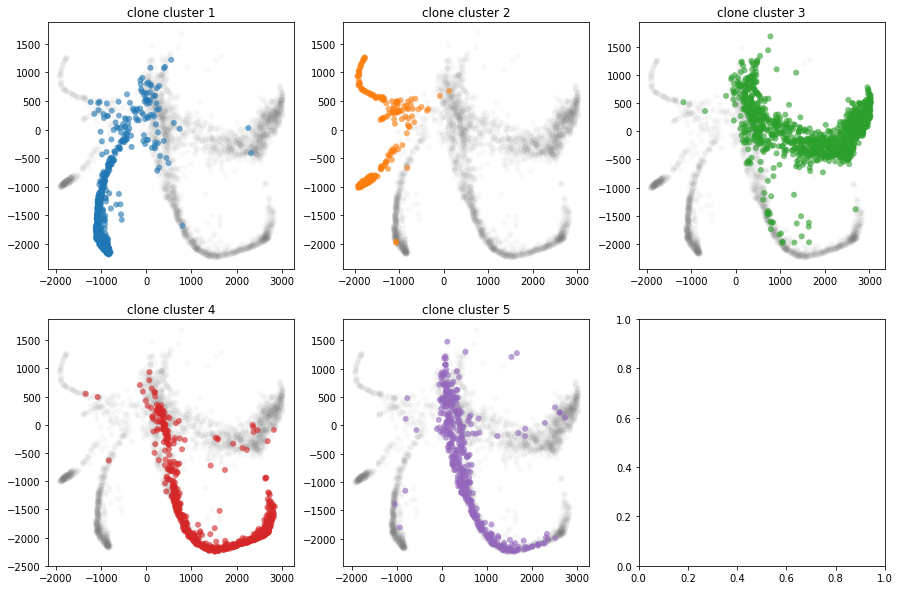

In [16]:
n_col = 3
n_row = int(np.ceil(len(np.unique(clone_clusters))/n_col))
colormap = sns.color_palette().as_hex()

fig, axs = plt.subplots(n_row,n_col,figsize=(5*n_col, 5*n_row))
for i,x in enumerate(np.unique(clone_clusters)):
    clone_cluster_i = df_coord.loc[df_clones.index[df_clones[df_clones_clusters.index[df_clones_clusters==x]].sum(axis=1)>0]]
    axs[int(np.floor(i/n_col)),i%n_col].scatter(df_coord['0'], df_coord['1'],
                                                c='gray',alpha=0.05,edgecolors='none')
    axs[int(np.floor(i/n_col)),i%n_col].scatter(clone_cluster_i['0'], clone_cluster_i['1'],
                                                c=colormap[i],edgecolors='none',alpha=0.6)
    axs[int(np.floor(i/n_col)),i%n_col].set_title('clone cluster '+str(x))